Imputing modules

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
data = pd.read_csv("breast-cancer-wisconsin.data", header=None)
data = data.drop(columns=0)
# Replace '?' with NaN
data.replace("?", pd.NA, inplace=True)
data = data.apply(pd.to_numeric, errors="coerce")
data.dropna(inplace=True)

In [ ]:
data.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
# 2. Split the data into features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
# 3. Perform a random 70-30 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 4. Build a univariate decision tree with pure leaf nodes
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_unpruned = accuracy_score(y_test, y_pred)
depth_unpruned = tree.get_depth()

In [ ]:
print(f"Accuracy (Unpruned): {accuracy_unpruned}")
print(f"Depth of Tree (Unpruned): {depth_unpruned}")

Accuracy (Unpruned): 0.9512195121951219
Depth of Tree (Unpruned): 7


In [ ]:
# 5. Allow pre-pruning by limiting the maximum depth
max_depths = range(1, 21)
accuracy_scores = []
depths = []
for max_depth in max_depths:
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    depths.append(tree.get_depth())


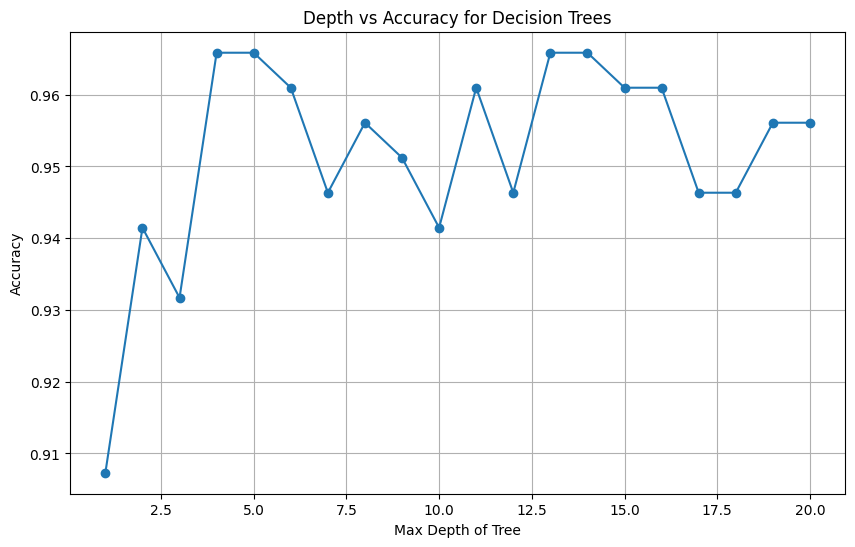

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Depth vs Accuracy for Decision Trees')
plt.grid(True)
plt.show()

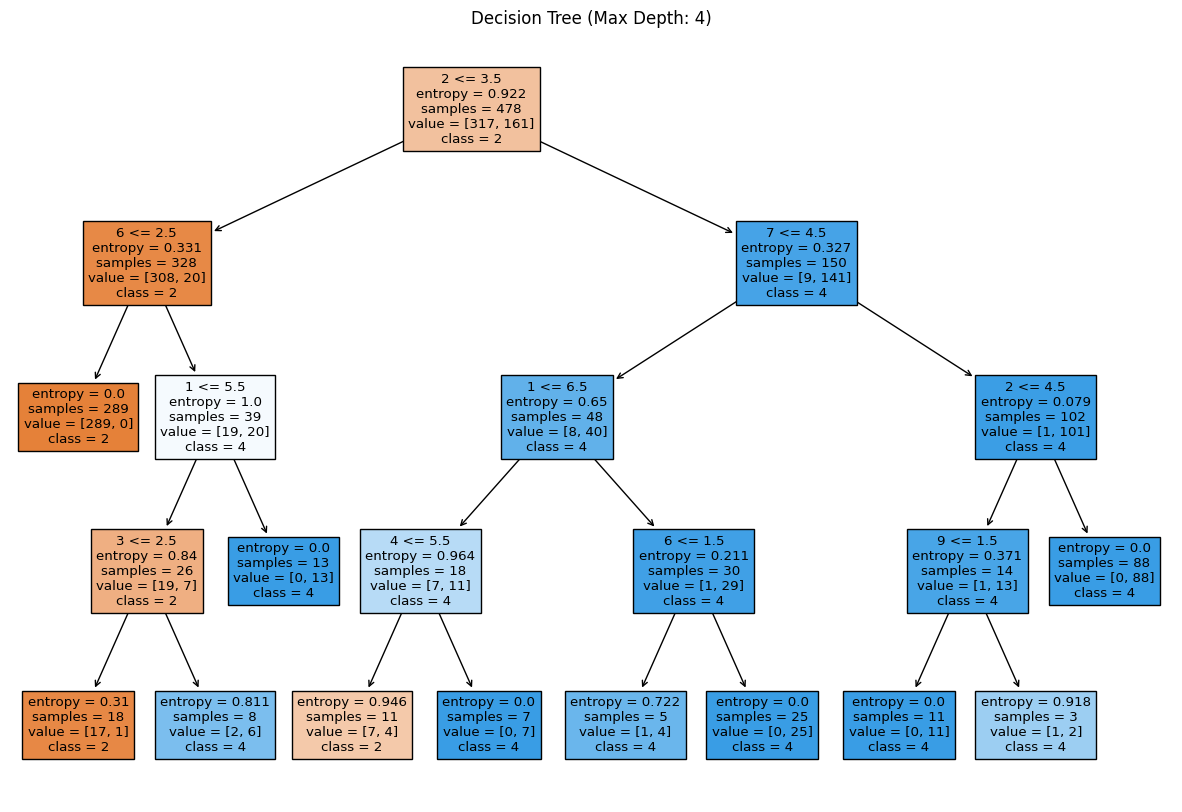

In [ ]:
# 7. Plot the tree with the highest accuracy on the test set
best_depth_index = np.argmax(accuracy_scores)
best_depth = max_depths[best_depth_index]
best_tree = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
best_tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(best_tree, filled=True, feature_names=data.columns[:-1], class_names=["2", "4"])
plt.title(f"Decision Tree (Max Depth: {best_depth})")
plt.show()